In [10]:
# Import de pandas
#Obtention de la population par région de 2014 à 2025 à partir d'un fichier Insee
import pandas as pd

In [11]:

# Chargement du DataFrame (exemple depuis un fichier CSV)
# Remplace 'ton_fichier.csv' par le chemin de ton fichier
df = pd.read_csv(r"C:/Users\thoma\OneDrive\Documents\ENSAE\2A\Python-pour-la-data-science\Projet\python_DS_2A\data\DS_ESTIMATION_POPULATION_data.csv", sep=';')
# https://catalogue-donnees.insee.fr/fr/catalogue/recherche/DS_ESTIMATION_POPULATION

In [12]:
# Filtrage des données :
# - années entre 2014 et 2025 inclus
# - GEO_OBJECT contenant "REG"
df_filtered = df[
    (df['TIME_PERIOD'].between(2014, 2025)) &
    (df['GEO_OBJECT'].str.contains('REG'))
]

# Réinitialisation des index pour un DataFrame propre
df_filtered = df_filtered.reset_index(drop=True)

# Sauvegarde optionnelle du DataFrame filtré dans un nouveau fichier CSV
df_filtered.to_csv('population.csv', index=False)

# Affichage des premières lignes pour vérifier
print(df_filtered.head())


  GEO GEO_OBJECT SEX     AGE EP_MEASURE OBS_STATUS_FR  TIME_PERIOD  OBS_VALUE
0  52        REG  _T  Y40T59        POP             D         2019   977955.0
1  32        REG   M  Y_LT20        POP             D         2018   800618.0
2  32        REG   M      _T        POP             D         2014  2914104.0
3  53        REG   F      _T        POP             D         2018  1714799.0
4   6        REG   M  Y40T59        POP             D         2015    17878.0


In [13]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17064 entries, 0 to 17063
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GEO            17064 non-null  object 
 1   GEO_OBJECT     17064 non-null  object 
 2   SEX            17064 non-null  object 
 3   AGE            17064 non-null  object 
 4   EP_MEASURE     17064 non-null  object 
 5   OBS_STATUS_FR  17064 non-null  object 
 6   TIME_PERIOD    17064 non-null  int64  
 7   OBS_VALUE      17064 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 1.0+ MB


In [14]:
region=pd.read_csv(r"C:\Users\thoma\OneDrive\Documents\ENSAE\2A\Python-pour-la-data-science\Projet\python_DS_2A\Liste de codes du dataset GEO (4).csv", sep=';')

In [15]:
# Ne garder que les lignes de type région
region_reg = region[region['code'].str.contains('REG', na=False)].copy()

# Extraire le numéro de région en entier (ex: 'REG-01' -> '1') et créer la colonne de libellé français
region_reg['code_num'] = region_reg['code'].str.replace('REG-', '', regex=False).astype(int).astype(str)
region_reg = region_reg.rename(columns={'libelle français': 'libelle_fr'})

# Construire le dictionnaire de mapping: '1' -> 'Île-de-France', etc.
mapping = dict(zip(region_reg['code_num'], region_reg['libelle_fr']))

# Assurer le type/format de la colonne GEO dans df_filtered puis créer une colonne avec le nom de région
df_filtered['GEO_str'] = df_filtered['GEO'].astype(str).str.strip()
df_filtered['region_nom'] = df_filtered['GEO_str'].map(mapping)

In [17]:
#garder que la colonne population et région_nom
df_population_region = df_filtered[['OBS_VALUE', 'region_nom','TIME_PERIOD']].copy()

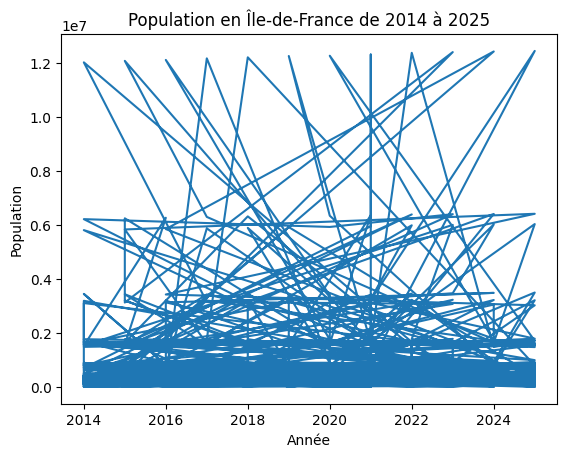

In [18]:
#graphique représentant la population en fonction du temps en Ile de France
import matplotlib.pyplot as plt 
df_idf = df_population_region[df_population_region['region_nom'] == 'Île-de-France']
plt.plot(df_idf['TIME_PERIOD'], df_idf['OBS_VALUE'])
plt.xlabel('Année')
plt.ylabel('Population')
plt.title('Population en Île-de-France de 2014 à 2025')
plt.show()